In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [26]:
df.shape

(48842, 15)

In [27]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
for col in df.columns:
    print(df[col].value_counts())

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
131379     1
160061     1
334224     1
45381      1
208174     1
Name: fnlwgt, Length: 28523, dtype: int64
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64
9     15784


In [15]:
df.replace('?', np.nan, inplace = True)

In [16]:
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

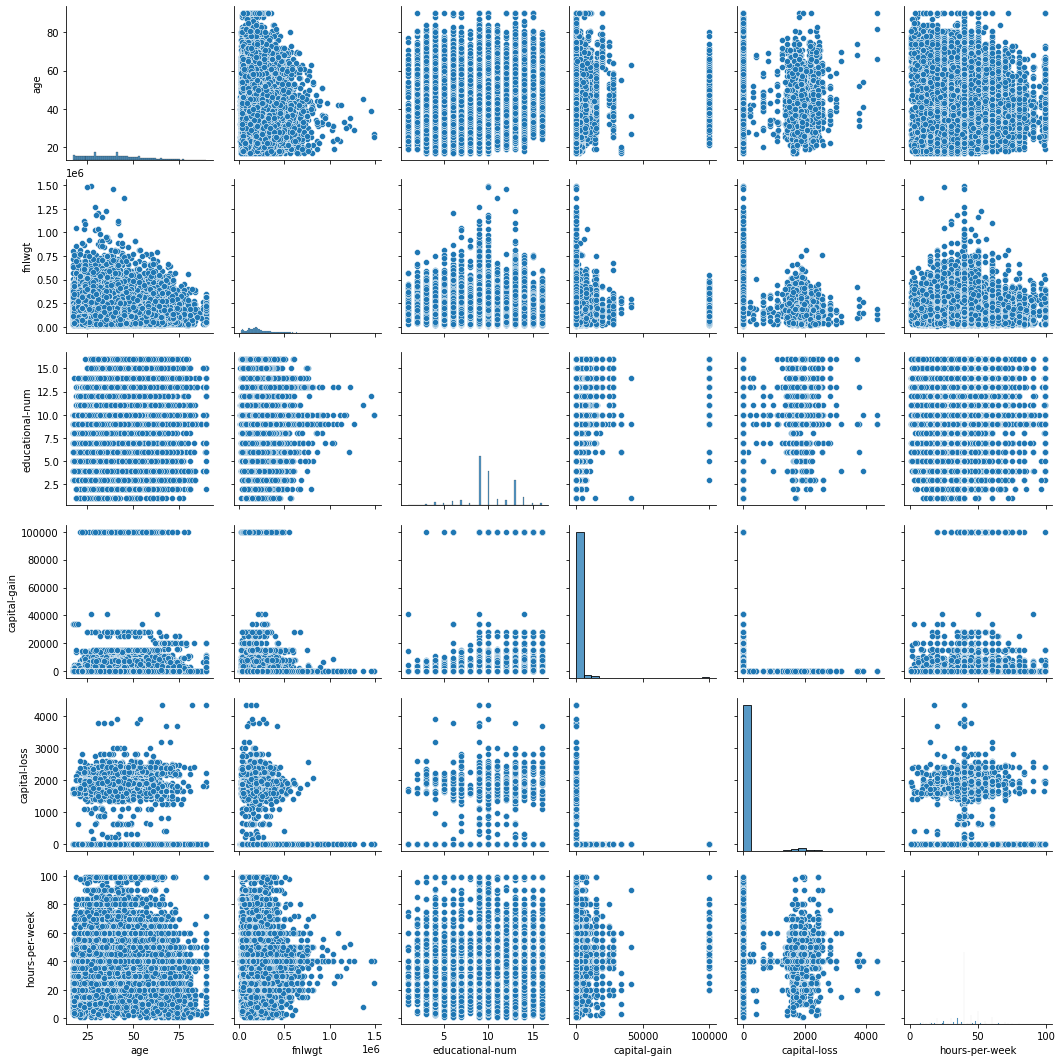

In [17]:
sns.pairplot(df)

We can see slight correlation between age and final weight.

In [21]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

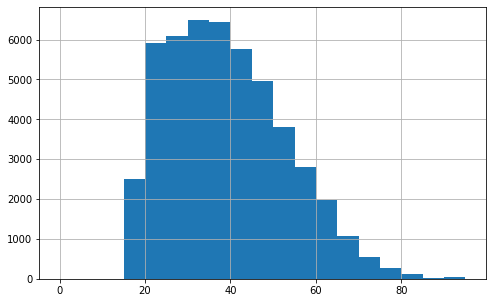

In [60]:
plt.figure(figsize = (8, 5))
plt.hist(df['age'], range = (0, 100), bins = [i*5 for i in range(0, 20)])
plt.grid()

 The majority of interviewed people are from 30 to 40 years old. The distribution is not symmetrical

<AxesSubplot: xlabel='age', ylabel='Density'>

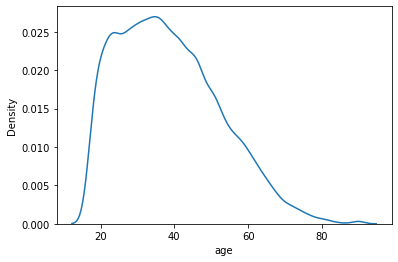

In [24]:
sns.kdeplot(data=df, x="age")

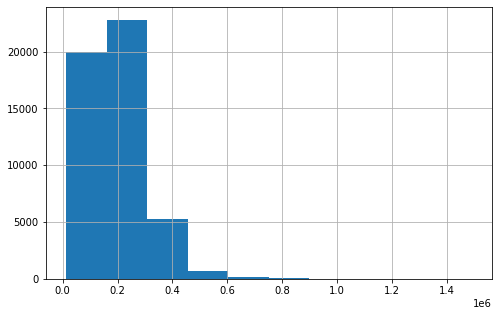

In [51]:
plt.figure(figsize = (8, 5))
plt.hist(df['fnlwgt'])
plt.grid()

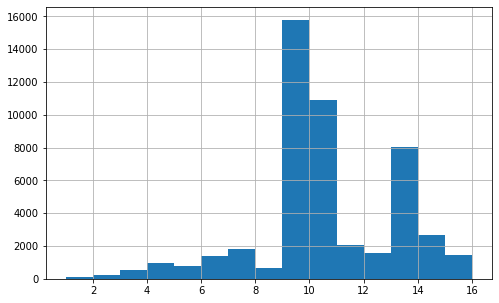

In [56]:
plt.figure(figsize = (8, 5))
plt.hist(df['educational-num'], bins = 15)
plt.grid()

Most people have 9,10 or 13 years of education. I believe it corresponds to bachelor, master and PhD degree.

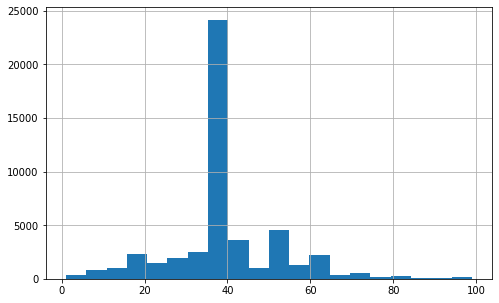

In [54]:
plt.figure(figsize = (8, 5))
plt.hist(df['hours-per-week'], bins = 20)
plt.grid()

Most people have full time job and work 40 hours a week

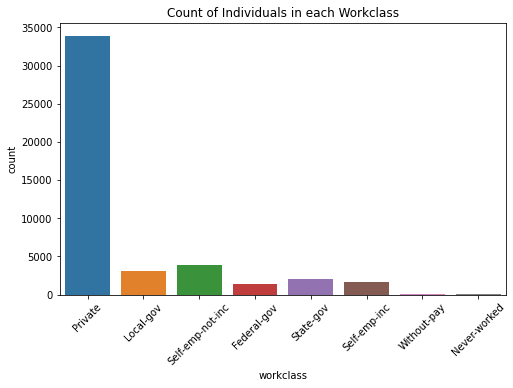

In [43]:
#Countplot for Workclass
plt.figure(figsize=(8, 5))
sns.countplot(x='workclass', data=df)
plt.xticks(rotation=45)
plt.title('Count of Individuals in each Workclass')
plt.show()

The vast majority classified themself as Private workclass  

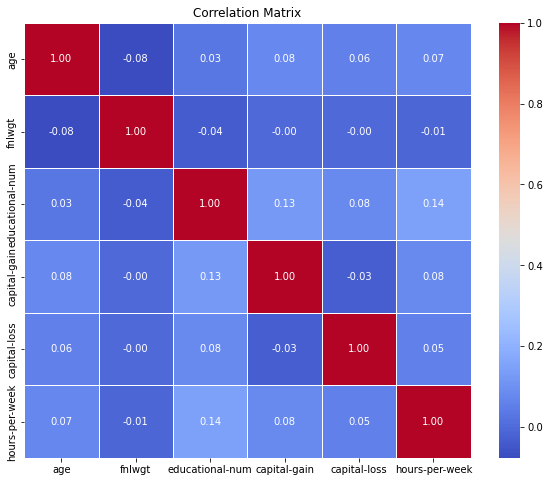

In [48]:
#Heatmap for Correlation Matrix

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Slight corrrelation between educational-num and hours per week, educational-num and capital gain correlations between other columns are lower

**Question 1.**
How many individuals fall into each income category (e.g., <=50K and >50K)?
What percentage of the population has income above 50K?

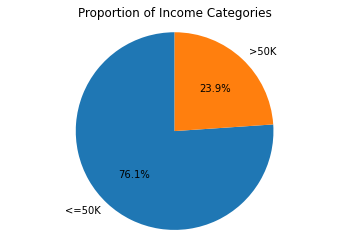

In [37]:
#Pie Chart for Proportion of Income Categories
#It shows that about quarter of responders have less then 50K (low) income, others have more
income_counts = df['income'].value_counts()
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Income Categories")
plt.axis('equal')
plt.show()

**Question 2.**
How does income vary with age and education level?
Is there a correlation between age and income?
How does the average income differ among different education levels?

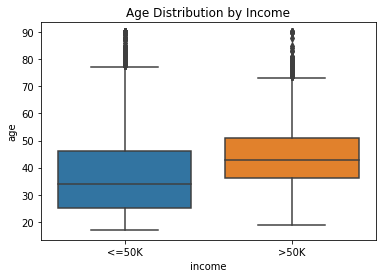

In [41]:
#Boxplot for Age and Income
sns.boxplot(x='income', y='age', data=df)
plt.title("Age Distribution by Income")
plt.show()

It shows that median of income is bigger at older age people

**Question 3.** What is dependency between education level and income? 

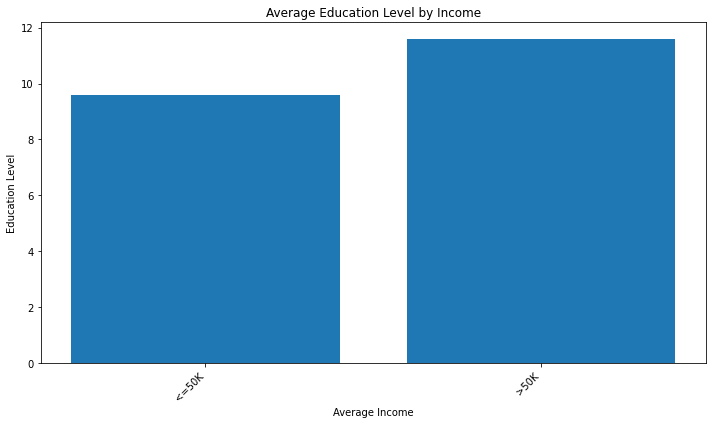

In [73]:
education_income = df.groupby('income')['educational-num'].mean().reset_index()
education_income = education_income.sort_values(by='educational-num')

plt.figure(figsize=(10, 6))
plt.bar(education_income['income'], education_income['educational-num'])

plt.ylabel('Education Level')
plt.xlabel('Average Income')
plt.title('Average Education Level by Income')
plt.xticks(rotation=45, ha='right')  

# Show the plot
plt.tight_layout()
plt.show()

We can see that the people with higher education level have higher income.

**Question 4.**
What is the gender distribution among high-income earners (>50K) and low-income earners (<=50K)?Are there any gender-based income disparities?

<Figure size 576x432 with 0 Axes>

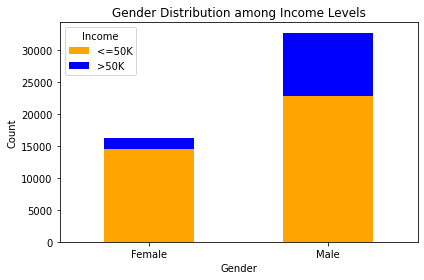

In [77]:
gender_income_count = df.groupby(['gender', 'income'])['income'].count().unstack()
plt.figure(figsize=(8, 6))
gender_income_count.plot(kind='bar', stacked=True, color=['orange', 'blue'])

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution among Income Levels')
plt.xticks(rotation=0)  

plt.legend(title='Income', labels=['<=50K', '>50K'])

plt.tight_layout()
plt.show()

As we cam see majority of intervieews are males. And also the distribution shows that the part of men getting >50K are bigger then the part of women. 

**Question 4.** How does race and ethnicity relate to income levels? 

<Figure size 2160x1440 with 0 Axes>

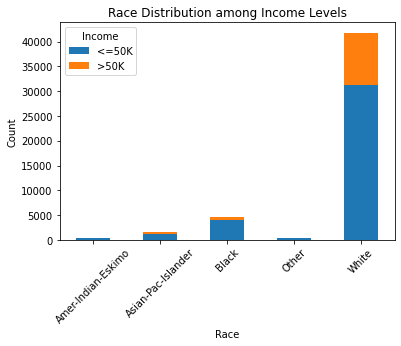

In [83]:
race_income_count = df.groupby(['race', 'income'])['income'].count().unstack()

plt.figure(figsize=(30, 20))
race_income_count.plot(kind='bar', stacked=True)

plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Race Distribution among Income Levels')
plt.xticks(rotation=45) 

plt.legend(title='Income', labels=['<=50K', '>50K'])

The largest part of the sampling are White. And the proportion of them who has higher income is the bigger.

**Question 5.** What is destribution hours-per-week by education?

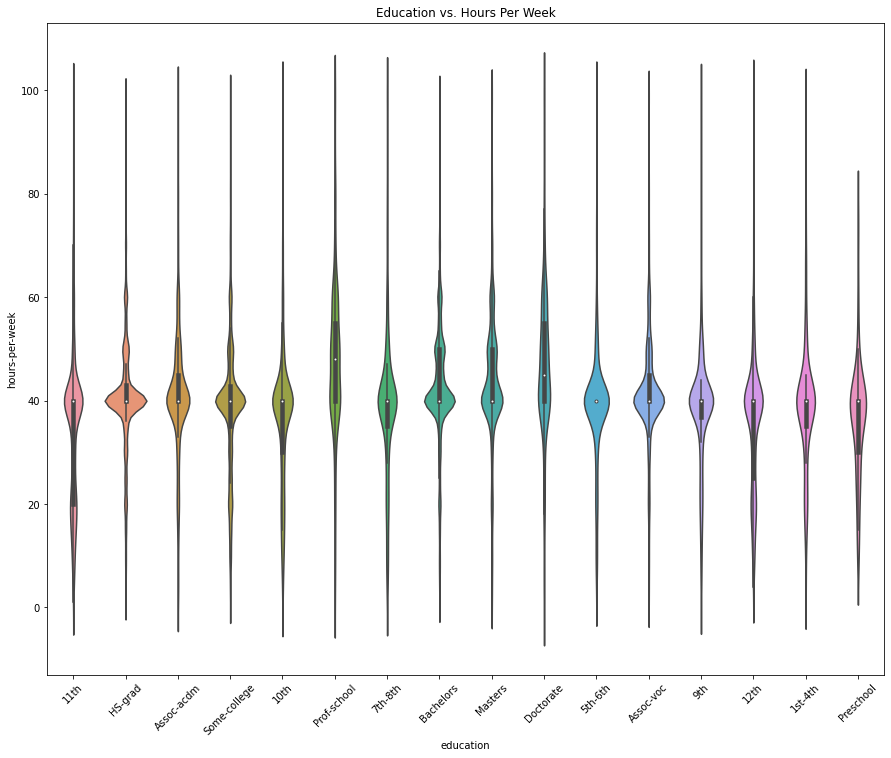

In [57]:
#Violinplot for Education vs. Hours Per Week
 
plt.figure(figsize=(15, 12))
sns.violinplot(x='education', y='hours-per-week', data=df)
plt.xticks(rotation=45)
plt.title('Education vs. Hours Per Week')
plt.show()

Median Hours per week for all types of education is 40 hours. For some types, interquantile range is bigger then for others. 10th, 11th, 12th, and Preschool have bigger interquantile range and it is lying in less then 40 hours per week range. The prof-school, bachelors, masters and doctorate tend to have more then 40 hours per week. 